Text(0.5, 1.0, 'Ridge divide')

<Figure size 432x288 with 0 Axes>

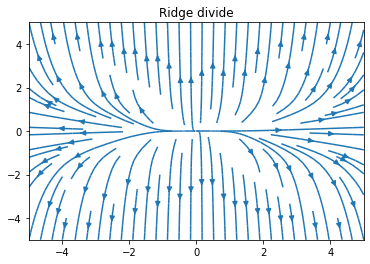

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
#%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

up = x/np.sqrt(x**2 + 100*y**2)
vp = y/np.sqrt(x**2 + y**2)

plt.figure()

#  Example 1
plt.figure()
plt.streamplot(x, y, up, vp)
plt.title('Ridge divide')

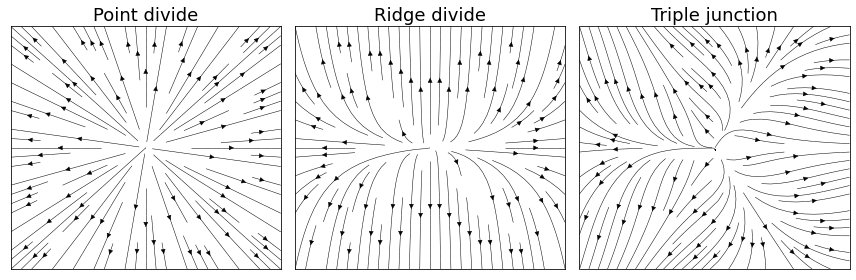

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x0=-100
y0=-100
xz=100
yz=100
pts=201
a=0.075
#b=0.008
ridge_scale=(a*(pts-1)/2)**2
theta_scale=0.8 #b*(pts-1)/2  

x,y = np.meshgrid(np.linspace(x0,xz,pts),np.linspace(y0,yz,pts))

def ur(theta):
    return 1.0 # + 0.3*np.cos(3.0*theta)

def utheta(theta):
    return -theta_scale*np.sin(3.0*theta)

def theta(x, y):
    if x != 0:
        if x>=0 and y>=0:
            th = np.arctan(y/x)
        elif x<0:
            th = np.arctan(y/x) + np.pi
        elif x>=0 and y<0:
            th = np.arctan(y/x) + 2.0*np.pi
    else:
        th = np.pi/2
    return th

def u(x,y):
    th = theta(x,y)
    return ur(th) * np.cos(th) - utheta(th) * np.sin(th)
    
def v(x,y):
    th = theta(x,y)
    return ur(th) * np.sin(th) + utheta(th) * np.cos(th)

vx = np.zeros((pts, pts))
vy = np.zeros((pts, pts))

for i in range(pts):
    for j in range(pts):
        vx[i][j] = u(x[i][j], y[i][j])
        vy[i][j] = v(x[i][j], y[i][j])

vx_pd = np.zeros((pts, pts))
vy_pd = np.zeros((pts, pts))
    
for i in range(pts):
    for j in range(pts):
        vx_pd[i][j] = x[i][j]/np.sqrt(x[i][j]**2 + y[i][j]**2) if (x[i][j]!=0 or y[i][j]!=0) else 0
        vy_pd[i][j] = y[i][j]/np.sqrt(x[i][j]**2 + y[i][j]**2) if (x[i][j]!=0 or y[i][j]!=0) else 0

vx_rd = np.zeros((pts, pts))
vy_rd = np.zeros((pts, pts))
    
for i in range(pts):
    for j in range(pts):
        vx_rd[i][j] = x[i][j]/np.sqrt(x[i][j]**2 + ridge_scale*y[i][j]**2) if (x[i][j]!=0 or y[i][j]!=0) else 0
        vy_rd[i][j] = y[i][j]/np.sqrt(x[i][j]**2 + y[i][j]**2) if (x[i][j]!=0 or y[i][j]!=0) else 0
        
fig, ax = plt.subplots(1, 3, figsize=(12,4))    
        
ax[0].streamplot(x, y, vx_pd, vy_pd, color='black', linewidth=0.5, density = 0.9)
ax[0].set_title('Point divide', fontsize=18)

ax[1].streamplot(x, y, vx_rd, vy_rd, color='black', linewidth=0.5, density = 0.9)
ax[1].set_title('Ridge divide', fontsize=18)

ax[2].streamplot(x, y, vx, vy, color='black', linewidth=0.5, density = 1.0)
ax[2].set_title('Triple junction', fontsize=18)

ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])

fig.tight_layout()
fig.savefig('../Images/DivideTypes.png', format='png', dpi=700, bbox_inches = "tight")


In [ ]:
x[0][10]


In [ ]:
np.pi/4

In [ ]:
np.arctan(-1/1) + 2*np.pi

In [ ]:
5*np.pi/4
